# Machine Learning Calving Day Prediction Final Version

# Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import itertools 
import warnings 
warnings.filterwarnings(action='ignore')
from datetime import datetime
import os 
import re

## Loading dataset

In [2]:
#Reading the dataset
df = pd.read_csv("before_calving_data.csv") 

## Basic coding

In [3]:
#First five rows of dataset
df.head() 

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,...,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days Before Calving,Hours Before Calving,Calved
0,12/10/2021,12/24/2021,8:04,3/16/2021,269,269.0,11,11,8,3,...,141,735,29,1.7,Normal,1,multiparous,-14,-360,0
1,12/11/2021,12/24/2021,8:04,3/16/2021,270,270.0,10,10,-2,3,...,131,827,32,1.5,Normal,1,multiparous,-13,-336,0
2,12/12/2021,12/24/2021,8:04,3/16/2021,271,271.0,9,9,8,3,...,144,660,31,2.1,Normal,1,multiparous,-12,-312,0
3,12/13/2021,12/24/2021,8:04,3/16/2021,272,272.0,8,8,-2,3,...,134,724,31,1.9,Normal,1,multiparous,-11,-264,0
4,12/14/2021,12/24/2021,8:04,3/16/2021,273,273.0,7,7,-6,3,...,129,742,31,1.9,Normal,1,multiparous,-10,-240,0


In [4]:
#last five rows of the dataset
df.tail() 

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,...,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days Before Calving,Hours Before Calving,Calved
4450,8/17/2022,8/21/2022,15:33,12/1/2021,259,259.0,21,21,-6,1744,...,200,463,77,4.8,Normal,1,primiparous,-4,-96,0
4451,8/18/2022,8/21/2022,15:33,12/1/2021,260,260.0,20,20,-1,1744,...,219,384,55,5.8,Normal,1,primiparous,-3,-72,0
4452,8/19/2022,8/21/2022,15:33,12/1/2021,261,261.0,19,19,-1,1744,...,214,454,76,4.1,Normal,1,primiparous,-2,-48,0
4453,8/20/2022,8/21/2022,15:33,12/1/2021,262,262.0,18,18,6,1744,...,229,471,52,4.4,Normal,1,primiparous,-1,-24,0
4454,8/21/2022,8/21/2022,15:33,12/1/2021,263,263.0,17,17,-1,1744,...,303,--,--,--,Normal,1,primiparous,0,0,1


In [5]:
#Shape of dataset 4455 rows & 25 columns
df.shape 

(4455, 25)

In [6]:
#Short statistical summary of dataset
df.describe() 

,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,Month Of Sensor Attachment,Lact No,Lactation No,Activity,Offspring,Days Before Calving,Hours Before Calving,Calved
count,4455.000000,2842.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000
mean,278.542312,265.305067,1.457688,9.437262,7.832099,1135.787879,6.165208,1.502581,1.485746,201.404714,1.010101,-7.000000,-172.800000,0.066442
std,28.535091,13.547477,28.535091,13.541619,34.380189,2248.679313,3.831850,0.757498,0.711514,77.944668,0.100006,4.320979,110.586188,0.249081
min,203.000000,203.000000,-220.000000,0.000000,-61.000000,3.000000,1.000000,1.000000,1.000000,54.000000,1.000000,-14.000000,-360.000000,0.000000
25%,266.000000,261.000000,-7.000000,0.000000,-12.000000,725.000000,3.000000,1.000000,1.000000,153.000000,1.000000,-11.000000,-264.000000,0.000000
50%,275.000000,269.000000,5.000000,5.000000,2.000000,1039.000000,5.000000,1.000000,1.000000,185.000000,1.000000,-7.000000,-168.000000,0.000000
75%,287.000000,275.000000,14.000000,14.000000,18.000000,1617.000000,10.000000,2.000000,2.000000,230.000000,1.000000,-3.000000,-72.000000,0.000000
max,500.000000,280.000000,77.000000,280.000000,824.000000,38656.000000,12.000000,4.000000,3.000000,1369.000000,2.000000,0.000000,0.000000,1.000000


In [7]:
#Data type of dataset
df.dtypes 

Date                           object
Calving Date                   object
Calving Time                   object
Insemination Date              object
Days Pregnancy                  int64
Days Pregnancy 1              float64
Expected Calving Days           int64
Expected Calving Days 1         int64
Heat Indicator                  int64
Cow ID                          int64
Month Of Sensor Attachment      int64
Calving Season                 object
Breed                          object
Lact No                         int64
Lactation No                    int64
Activity                        int64
Rest Time                      object
Rest Per Bout                  object
Restlessness Ratio             object
Manner Of Calving              object
Offspring                       int64
Parity                         object
Days Before Calving             int64
Hours Before Calving            int64
Calved                          int64
dtype: object

# Cleaning section

In [8]:
#Replacing "--" values and converting into string
df = df.replace("\--", " ", regex=True).astype('str') 

In [9]:
#Replacing string format into nan values 
df = df.replace(r'^\s*$', np.nan, regex=True)

In [10]:
#Missing values inside the dataset
df.isnull().sum().sort_values(ascending=False) 

Restlessness Ratio            2
Rest Per Bout                 2
Rest Time                     2
Date                          0
Lact No                       0
Hours Before Calving          0
Days Before Calving           0
Parity                        0
Offspring                     0
Manner Of Calving             0
Activity                      0
Lactation No                  0
Breed                         0
Calving Date                  0
Calving Season                0
Month Of Sensor Attachment    0
Cow ID                        0
Heat Indicator                0
Expected Calving Days 1       0
Expected Calving Days         0
Days Pregnancy 1              0
Days Pregnancy                0
Insemination Date             0
Calving Time                  0
Calved                        0
dtype: int64

## Visualization of missing values

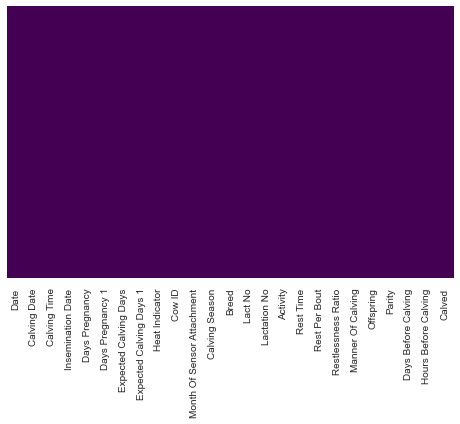

In [11]:
#Setting the background style for chart
sns.set_style('white')
#Setting the figure size
sns.set(rc={'figure.figsize':(8,5)})
#Generating the heatmap to check the NAN values inside the dataset
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
#Setting the x ticks for chart
plt.xticks(fontsize=10, rotation='vertical')
#Show the chart
plt.show()

In [12]:
#Checking missing values inside the dataset
df.isnull().sum().sort_values(ascending=True)

Date                          0
Days Before Calving           0
Parity                        0
Offspring                     0
Manner Of Calving             0
Activity                      0
Lactation No                  0
Lact No                       0
Hours Before Calving          0
Calving Season                0
Breed                         0
Cow ID                        0
Heat Indicator                0
Expected Calving Days 1       0
Expected Calving Days         0
Days Pregnancy 1              0
Days Pregnancy                0
Insemination Date             0
Calving Time                  0
Calving Date                  0
Month Of Sensor Attachment    0
Calved                        0
Rest Time                     2
Rest Per Bout                 2
Restlessness Ratio            2
dtype: int64

## Imputation of missing values through itterative imputation technique

### Libraries

In [13]:
#Importing libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor 

In [14]:
#Variables containing NAN values
columns_with_missing_values = ['Rest Time', 'Rest Per Bout', 'Restlessness Ratio']

#Creating multiple imputation techniques to impute columns with missing values
imputer_mice = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df[columns_with_missing_values] = imputer_mice.fit_transform(df[columns_with_missing_values])

In [15]:
#Verfying the missing values after imputating of missing values through iterative imputer
df.isnull().sum().sort_values() 

Date                          0
Days Before Calving           0
Parity                        0
Offspring                     0
Manner Of Calving             0
Restlessness Ratio            0
Rest Per Bout                 0
Rest Time                     0
Activity                      0
Lactation No                  0
Lact No                       0
Hours Before Calving          0
Breed                         0
Month Of Sensor Attachment    0
Cow ID                        0
Heat Indicator                0
Expected Calving Days 1       0
Expected Calving Days         0
Days Pregnancy 1              0
Days Pregnancy                0
Insemination Date             0
Calving Time                  0
Calving Date                  0
Calving Season                0
Calved                        0
dtype: int64

# Saving cleaned dataset

In [16]:
#Saving the clean data set 
df.to_csv('before_calving_clean_data.csv', index=False)

# Reloading dataset

In [17]:
#Reloading the clean dataset
df = pd.read_csv('before_calving_clean_data.csv')

In [18]:
#Reading First five rows of the dataset
df.head()

,Date,Calving Date,Calving Time,Insemination Date,Days Pregnancy,Days Pregnancy 1,Expected Calving Days,Expected Calving Days 1,Heat Indicator,Cow ID,...,Activity,Rest Time,Rest Per Bout,Restlessness Ratio,Manner Of Calving,Offspring,Parity,Days Before Calving,Hours Before Calving,Calved
0,12/10/2021,12/24/2021,8:04,3/16/2021,269,269.0,11,11,8,3,...,141,735.0,29.0,1.7,Normal,1,multiparous,-14,-360,0
1,12/11/2021,12/24/2021,8:04,3/16/2021,270,270.0,10,10,-2,3,...,131,827.0,32.0,1.5,Normal,1,multiparous,-13,-336,0
2,12/12/2021,12/24/2021,8:04,3/16/2021,271,271.0,9,9,8,3,...,144,660.0,31.0,2.1,Normal,1,multiparous,-12,-312,0
3,12/13/2021,12/24/2021,8:04,3/16/2021,272,272.0,8,8,-2,3,...,134,724.0,31.0,1.9,Normal,1,multiparous,-11,-264,0
4,12/14/2021,12/24/2021,8:04,3/16/2021,273,273.0,7,7,-6,3,...,129,742.0,31.0,1.9,Normal,1,multiparous,-10,-240,0


In [19]:
#Checking the columns inside the dataset
df.columns

Index(['Date', 'Calving Date', 'Calving Time', 'Insemination Date',
       'Days Pregnancy', 'Days Pregnancy 1', 'Expected Calving Days',
       'Expected Calving Days 1', 'Heat Indicator', 'Cow ID',
       'Month Of Sensor Attachment', 'Calving Season', 'Breed', 'Lact No',
       'Lactation No', 'Activity', 'Rest Time', 'Rest Per Bout',
       'Restlessness Ratio', 'Manner Of Calving', 'Offspring', 'Parity',
       'Days Before Calving', 'Hours Before Calving', 'Calved'],
      dtype='object')

## Conversion of data types into proper data types

In [20]:
#Conversion of data types into proper data type
df['Date'] = pd.to_datetime(df['Date'])
df['date'] = df['Date'].astype('datetime64[ns]')
df['Calving Date'] = pd.to_datetime(df['Calving Date'])
df['Calving Date'] = df['Calving Date'].astype('datetime64[ns]')
df['Insemination Date'] = pd.to_datetime(df['Insemination Date'])
df['Insemination Date'] = pd.to_datetime(df['Insemination Date'])
df['Days Pregnancy'] = df['Days Pregnancy'].astype('int64')
df['Heat Indicator'] = df['Heat Indicator'].astype('int64')
df['Activity'] = df['Activity'].astype('int64')
df['Rest Time'] = df['Rest Time'].astype('int64')
df['Rest Per Bout'] = df['Rest Per Bout'].astype('int64')
df['Restlessness Ratio'] = df['Restlessness Ratio'].astype('float64')
df['Offspring'] = df['Offspring'].astype('int64')
df['Calved'] = df['Calved'].astype('int64')
df['Hours Before Calving'] = df['Hours Before Calving'].astype('int64')
df['Days Before Calving'] = df['Days Before Calving'].astype('int64')
df['Cow ID'] = df['Cow ID'].astype('int64')
df['Expected Calving Days'] = df['Expected Calving Days'].astype('int64')
df['Expected Calving Days 1'] = df['Expected Calving Days 1'].astype('int64')
df['Month Of Sensor Attachment'] = df['Month Of Sensor Attachment'].astype('int64')
df['Lact No'] = df['Lact No'].astype('object')
df['Lactation No'] = df['Lactation No'].astype('object')
df['Days Pregnancy 1'] = df['Days Pregnancy 1'].astype('object')

In [21]:
#Checking datatypes of dataset after proper conversion
df.dtypes 

Date                          datetime64[ns]
Calving Date                  datetime64[ns]
Calving Time                          object
Insemination Date             datetime64[ns]
Days Pregnancy                         int64
Days Pregnancy 1                      object
Expected Calving Days                  int64
Expected Calving Days 1                int64
Heat Indicator                         int64
Cow ID                                 int64
Month Of Sensor Attachment             int64
Calving Season                        object
Breed                                 object
Lact No                               object
Lactation No                          object
Activity                               int64
Rest Time                              int64
Rest Per Bout                          int64
Restlessness Ratio                   float64
Manner Of Calving                     object
Offspring                              int64
Parity                                object
Days Befor

# Extraction of numerical & and categorical features

In [22]:
#Numerical features of dataset
numercial_features = [col for col in df.columns if df[col].dtype!='O']
numercial_features

['Date',
 'Calving Date',
 'Insemination Date',
 'Days Pregnancy',
 'Expected Calving Days',
 'Expected Calving Days 1',
 'Heat Indicator',
 'Cow ID',
 'Month Of Sensor Attachment',
 'Activity',
 'Rest Time',
 'Rest Per Bout',
 'Restlessness Ratio',
 'Offspring',
 'Days Before Calving',
 'Hours Before Calving',
 'Calved',
 'date']

In [23]:
#Categorical features of dataset
categorical_features=[col for col in df.columns if df[col].dtypes=='O']
categorical_features

['Calving Time',
 'Days Pregnancy 1',
 'Calving Season',
 'Breed',
 'Lact No',
 'Lactation No',
 'Manner Of Calving',
 'Parity']

# Machine Learning 

### Libraries

In [24]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, fbeta_score
from sklearn.preprocessing import LabelEncoder

## Encoding categorical variables

In [25]:
#Encoding the categorical variables 
label_encoder = LabelEncoder()
df['Calving Time'] = label_encoder.fit_transform(df['Calving Time'])
df['Days Pregnancy 1'] = label_encoder.fit_transform(df['Days Pregnancy 1'])
df['Calving Season'] = label_encoder.fit_transform(df['Calving Season'])
df['Breed'] = label_encoder.fit_transform(df['Breed'])
df['Lact No'] = label_encoder.fit_transform(df['Lact No'])
df['Lactation No'] = label_encoder.fit_transform(df['Lactation No'])
df['Manner Of Calving'] = label_encoder.fit_transform(df['Manner Of Calving'])
df['Parity'] = label_encoder.fit_transform(df['Parity'])

## Conversion of date column

In [26]:
#Converting datetime columns to numerical datatype 
df['Date'] = pd.to_numeric(df['Date'])
df['Calving Time'] = pd.to_numeric(df['Calving Time'])
df['Calving Date'] = pd.to_numeric(df['Calving Date'])
df['Insemination Date'] = pd.to_numeric(df['Insemination Date'])

## Getting features from dataset

In [27]:
#Independent variables of dataset
X = df[['Activity', 'Rest Time', 'Rest Per Bout','Restlessness Ratio','Lactation No', 'Month Of Sensor Attachment']]
#Dependent variable of dataset
y = df['Calved']

## Splitting the dataset

In [28]:
#Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4455)

## Feature Scaling

In [29]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [113]:
#Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_scaled, y_train)
logistic_reg_predictions = logistic_reg.predict(X_test_scaled)
logistic_reg_conf_matrix = confusion_matrix(y_test, logistic_reg_predictions)

logistic_reg_sensitivity = logistic_reg_conf_matrix[1, 1] / (logistic_reg_conf_matrix[1, 1] + logistic_reg_conf_matrix[1, 0]) * 100
logistic_reg_specificity = logistic_reg_conf_matrix[0, 0] / (logistic_reg_conf_matrix[0, 0] + logistic_reg_conf_matrix[0, 1]) * 100
logistic_reg_ppv = logistic_reg_conf_matrix[1, 1] / (logistic_reg_conf_matrix[1, 1] + logistic_reg_conf_matrix[0, 1]) * 100
logistic_reg_npv = logistic_reg_conf_matrix[0, 0] / (logistic_reg_conf_matrix[0, 0] + logistic_reg_conf_matrix[1, 0]) * 100
logistic_reg_accuracy = accuracy_score(y_test, logistic_reg_predictions) * 100
#Calculating F2 score for Logistic Regression
beta = 2
logistic_reg_f2 = fbeta_score(y_test, logistic_reg_predictions, beta=beta) * 100

# Printing Result

In [114]:
# Printing results for Logistic Regression with F2 score
print('Logistic Regression:')
print('Confusion Matrix:')
print(logistic_reg_conf_matrix)
print('Sensitivity: {:.2f}%'.format(logistic_reg_sensitivity))
print('Specificity: {:.2f}%'.format(logistic_reg_specificity))
print('Positive Predictive Value: {:.2f}%'.format(logistic_reg_ppv))
print('Negative Predictive Value: {:.2f}%'.format(logistic_reg_npv))
print('Accuracy Score: {:.2f}%'.format(logistic_reg_accuracy))
print('F2 Score: {:.2f}%'.format(logistic_reg_f2))
print()

Logistic Regression:
Confusion Matrix:
[[833   3]
 [ 47   8]]
Sensitivity: 14.55%
Specificity: 99.64%
Positive Predictive Value: 72.73%
Negative Predictive Value: 94.66%
Accuracy Score: 94.39%
F2 Score: 17.32%



## Random Forest

In [115]:
#Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
random_forest_predictions = random_forest.predict(X_test_scaled)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

random_forest_sensitivity = random_forest_conf_matrix[1, 1] / (random_forest_conf_matrix[1, 1] + random_forest_conf_matrix[1, 0]) * 100
random_forest_specificity = random_forest_conf_matrix[0, 0] / (random_forest_conf_matrix[0, 0] + random_forest_conf_matrix[0, 1]) * 100
random_forest_ppv = random_forest_conf_matrix[1, 1] / (random_forest_conf_matrix[1, 1] + random_forest_conf_matrix[0, 1]) * 100
random_forest_npv = random_forest_conf_matrix[0, 0] / (random_forest_conf_matrix[0, 0] + random_forest_conf_matrix[1, 0]) * 100
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions) * 100
random_forest_f1 = f1_score(y_test, random_forest_predictions) * 100
#Calculating F2 score for Random Forest
beta = 2
random_forest_f2 = fbeta_score(y_test, random_forest_predictions, beta=beta) * 100

# Printing Result

In [116]:
print('Random Forest:')
print('Confusion Matrix:')
print(random_forest_conf_matrix)
print('Sensitivity: {:.2f}%'.format(random_forest_sensitivity))
print('Specificity: {:.2f}%'.format(random_forest_specificity))
print('Positive Predictive Value: {:.2f}%'.format(random_forest_ppv))
print('Negative Predictive Value: {:.2f}%'.format(random_forest_npv))
print('Accuracy Score: {:.2f}%'.format(random_forest_accuracy))
print('F2 Score: {:.2f}%'.format(random_forest_f2))
print()

Random Forest:
Confusion Matrix:
[[826  10]
 [ 33  22]]
Sensitivity: 40.00%
Specificity: 98.80%
Positive Predictive Value: 68.75%
Negative Predictive Value: 96.16%
Accuracy Score: 95.17%
F2 Score: 43.65%



## Gradient Boosting

In [117]:
#Gradient Boosting
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test_scaled)
gradient_boosting_conf_matrix = confusion_matrix(y_test, gradient_boosting_predictions)


gradient_boosting_sensitivity = gradient_boosting_conf_matrix[1, 1] / (gradient_boosting_conf_matrix[1, 1] + gradient_boosting_conf_matrix[1, 0]) * 100
gradient_boosting_specificity = random_forest_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[0, 1]) * 100
gradient_boosting_ppv = gradient_boosting_conf_matrix[1, 1] / (gradient_boosting_conf_matrix[1, 1] + gradient_boosting_conf_matrix[0, 1]) * 100
gradient_boosting_npv = gradient_boosting_conf_matrix[0, 0] / (gradient_boosting_conf_matrix[0, 0] + gradient_boosting_conf_matrix[1, 0]) * 100
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions) * 100
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_predictions) * 100
#Calculating F2 score for Gradient Boosting
beta = 2
gradient_boosting_f2 = fbeta_score(y_test, gradient_boosting_predictions, beta=beta) * 100

# Printing Result

In [118]:
print('Gradient Boosting:')
print('Confusion Matrix:')
print(gradient_boosting_conf_matrix)
print('Sensitivity: {:.2f}%'.format(gradient_boosting_sensitivity))
print('Specificity: {:.2f}%'.format(gradient_boosting_specificity))
print('Positive Predictive Value: {:.2f}%'.format(gradient_boosting_ppv))
print('Negative Predictive Value: {:.2f}%'.format(gradient_boosting_npv))
print('Accuracy Score: {:.2f}%'.format(gradient_boosting_accuracy))
print('F2 Score: {:.2f}%'.format(gradient_boosting_f2))
print()

Gradient Boosting:
Confusion Matrix:
[[821  15]
 [ 36  19]]
Sensitivity: 34.55%
Specificity: 98.80%
Positive Predictive Value: 55.88%
Negative Predictive Value: 95.80%
Accuracy Score: 94.28%
F2 Score: 37.40%



## Support Vector Machine (SVM)

In [119]:
#Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_predictions = svm.predict(X_test_scaled)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

svm_sensitivity = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[1, 0]) * 100
svm_specificity = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[0, 1]) * 100
svm_ppv = svm_conf_matrix[1, 1] / (svm_conf_matrix[1, 1] + svm_conf_matrix[0, 1]) * 100
svm_npv = svm_conf_matrix[0, 0] / (svm_conf_matrix[0, 0] + svm_conf_matrix[1, 0]) * 100
svm_accuracy = accuracy_score(y_test, svm_predictions) * 100
svm_f1 = f1_score(y_test, svm_predictions) * 100
#Calculating F2 score for Support Vector Machine (SVM)
beta = 2
svm_f2 = fbeta_score(y_test, svm_predictions, beta=beta) * 100

# Printing Result

In [120]:
print('Support Vector Machine (SVM):')
print('Confusion Matrix:')
print(svm_conf_matrix)
print('Sensitivity: {:.2f}%'.format(svm_sensitivity))
print('Specificity: {:.2f}%'.format(svm_specificity))
print('Positive Predictive Value: {:.2f}%'.format(svm_ppv))
print('Negative Predictive Value: {:.2f}%'.format(svm_npv))
print('Accuracy Score: {:.2f}%'.format(svm_accuracy))
print('F2 Score: {:.2f}%'.format(svm_f2))
print()

Support Vector Machine (SVM):
Confusion Matrix:
[[826  10]
 [ 42  13]]
Sensitivity: 23.64%
Specificity: 98.80%
Positive Predictive Value: 56.52%
Negative Predictive Value: 95.16%
Accuracy Score: 94.16%
F2 Score: 26.75%



## K-Nearest Neighbors (KNN)

In [121]:
#K-nearest neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

knn_sensitivity = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 1] + knn_conf_matrix[1, 0]) * 100
knn_specificity = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[0, 1]) * 100
knn_ppv = knn_conf_matrix[1, 1] / (knn_conf_matrix[1, 1] + knn_conf_matrix[0, 1]) * 100
knn_npv = knn_conf_matrix[0, 0] / (knn_conf_matrix[0, 0] + knn_conf_matrix[1, 0]) * 100
knn_accuracy = accuracy_score(y_test, knn_predictions) * 100
knn_f1 = f1_score(y_test, knn_predictions) * 100
#Calculating F2 score for K-Nearest neighbors (KNN)
beta = 2
knn_f2 = fbeta_score(y_test, knn_predictions, beta=beta) * 100

# Printing Result

In [122]:
print('K-Nearest Neighbors (KNN):')
print('Confusion Matrix:')
print(knn_conf_matrix)
print('Sensitivity: {:.2f}%'.format(knn_sensitivity))
print('Specificity: {:.2f}%'.format(knn_specificity))
print('Positive Predictive Value: {:.2f}%'.format(knn_ppv))
print('Negative Predictive Value: {:.2f}%'.format(knn_npv))
print('Accuracy Score: {:.2f}%'.format(knn_accuracy))
print('F2 Score: {:.2f}%'.format(knn_f2))
print()

K-Nearest Neighbors (KNN):
Confusion Matrix:
[[824  12]
 [ 39  16]]
Sensitivity: 29.09%
Specificity: 98.56%
Positive Predictive Value: 57.14%
Negative Predictive Value: 95.48%
Accuracy Score: 94.28%
F2 Score: 32.26%



## Decision Tree

In [133]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

decision_tree_sensitivity = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 1] + decision_tree_conf_matrix[1, 0]) * 100
decision_tree_specificity = decision_tree_conf_matrix[0, 0] / (decision_tree_conf_matrix[0, 0] + decision_tree_conf_matrix[0, 1]) * 100
decision_tree_ppv = decision_tree_conf_matrix[1, 1] / (decision_tree_conf_matrix[1, 1] + decision_tree_conf_matrix[0, 1]) * 100
decision_tree_npv = decision_tree_conf_matrix[0, 0] / (decision_tree_conf_matrix[0, 0] + decision_tree_conf_matrix[1, 0]) * 100
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions) * 100
decision_tree_f1 = f1_score(y_test, decision_tree_predictions) * 100
#Calculating F2 score for Decision Tree (DT)
beta = 2
decision_tree_f2 = fbeta_score(y_test, decision_tree_predictions, beta=beta) * 100

# Printing Result

In [134]:
print('Decision Tree (DT):')
print('Confusion Matrix:')
print(decision_tree_conf_matrix)
print('Sensitivity: {:.2f}%'.format(decision_tree_sensitivity))
print('Specificity: {:.2f}%'.format(decision_tree_specificity))
print('Positive Predictive Value: {:.2f}%'.format(decision_tree_ppv))
print('Negative Predictive Value: {:.2f}%'.format(decision_tree_npv))
print('Accuracy Score: {:.2f}%'.format(decision_tree_accuracy))
print('F2 Score: {:.2f}%'.format(decision_tree_f2))
print()

Decision Tree (DT):
Confusion Matrix:
[[787  49]
 [ 28  27]]
Sensitivity: 49.09%
Specificity: 94.14%
Positive Predictive Value: 35.53%
Negative Predictive Value: 96.56%
Accuracy Score: 91.36%
F2 Score: 45.61%



## Naive Bayes

In [135]:
#Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)
naive_bayes_conf_matrix = confusion_matrix(y_test, naive_bayes_predictions)


naive_bayes_sensitivity = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 1] + naive_bayes_conf_matrix[1, 0]) * 100
naive_bayes_specificity = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[0, 1]) * 100
naive_bayes_ppv = naive_bayes_conf_matrix[1, 1] / (naive_bayes_conf_matrix[1, 1] + naive_bayes_conf_matrix[0, 1]) * 100
naive_bayes_npv = naive_bayes_conf_matrix[0, 0] / (naive_bayes_conf_matrix[0, 0] + naive_bayes_conf_matrix[1, 0]) * 100
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions) * 100
naive_bayes_f1 = f1_score(y_test, naive_bayes_predictions) * 100
#Calculating F2 score for Naive Bayes
beta = 2
naive_bayes_f2 = fbeta_score(y_test, naive_bayes_predictions, beta=beta) * 100

# Printing Result

In [136]:
print('Naive Bayes:')
print('Confusion Matrix:')
print(naive_bayes_conf_matrix)
print('Sensitivity: {:.2f}%'.format(naive_bayes_sensitivity))
print('Specificity: {:.2f}%'.format(naive_bayes_specificity))
print('Positive Predictive Value: {:.2f}%'.format(naive_bayes_ppv))
print('Negative Predictive Value: {:.2f}%'.format(naive_bayes_npv))
print('Accuracy Score: {:.2f}%'.format(naive_bayes_accuracy))
print('F2 Score: {:.2f}%'.format(naive_bayes_f2))
print()

Naive Bayes:
Confusion Matrix:
[[799  37]
 [ 28  27]]
Sensitivity: 49.09%
Specificity: 95.57%
Positive Predictive Value: 42.19%
Negative Predictive Value: 96.61%
Accuracy Score: 92.70%
F2 Score: 47.54%



## Neural Netwrok (Multilayer Perceptron)

In [147]:
#Neural Network (Multilayer Perceptron)
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
mlp_predictions = mlp.predict(X_test_scaled)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)

mlp_sensitivity = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[1, 0]) * 100
mlp_specificity = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[0, 1]) * 100
mlp_ppv = mlp_conf_matrix[1, 1] / (mlp_conf_matrix[1, 1] + mlp_conf_matrix[0, 1]) * 100
mlp_npv = mlp_conf_matrix[0, 0] / (mlp_conf_matrix[0, 0] + mlp_conf_matrix[1, 0]) * 100
mlp_accuracy = accuracy_score(y_test, mlp_predictions) * 100
mlp_f1 = f1_score(y_test, mlp_predictions) * 100
#Calculating F2 score for neural network (multilayer perception)
beta = 2
mlp_f2 = fbeta_score(y_test, mlp_predictions, beta=beta) * 100

# Printing Result

In [148]:
print('Neural Network (Multilayer Perceptron):')
print('Confusion Matrix:')
print(mlp_conf_matrix)
print('Sensitivity: {:.2f}%'.format(mlp_sensitivity))
print('Specificity: {:.2f}%'.format(mlp_specificity))
print('Positive Predictive Value: {:.2f}%'.format(mlp_ppv))
print('Negative Predictive Value: {:.2f}%'.format(mlp_npv))
print('Accuracy Score: {:.2f}%'.format(mlp_accuracy))
print('F2 Score: {:.2f}%'.format(mlp_f2))
print()

Neural Network (Multilayer Perceptron):
Confusion Matrix:
[[827   9]
 [ 33  22]]
Sensitivity: 40.00%
Specificity: 98.92%
Positive Predictive Value: 70.97%
Negative Predictive Value: 96.16%
Accuracy Score: 95.29%
F2 Score: 43.82%



## AdaBoost

In [149]:
#AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)
adaboost_predictions = adaboost.predict(X_test_scaled)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)

adaboost_sensitivity = adaboost_conf_matrix[1, 1] / (adaboost_conf_matrix[1, 1] + adaboost_conf_matrix[1, 0]) * 100
adaboost_specificity = adaboost_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + adaboost_conf_matrix[0, 1]) * 100
adaboost_ppv = adaboost_conf_matrix[1, 1] / (adaboost_conf_matrix[1, 1] + adaboost_conf_matrix[0, 1]) * 100
adaboost_npv = adaboost_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + adaboost_conf_matrix[1, 0]) * 100
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions) * 100
adaboost_f1 = f1_score(y_test, adaboost_predictions) * 100
#Calculating F2 score for Adaboost
beta = 2
adaboost_f2 = fbeta_score(y_test, adaboost_predictions, beta=beta) * 100

# Printing Results

In [150]:
print('Adaboost:')
print('Confusion Matrix:')
print(adaboost_conf_matrix)
print('Sensitivity: {:.2f}%'.format(adaboost_sensitivity))
print('Specificity: {:.2f}%'.format(adaboost_specificity))
print('Positive Predictive Value: {:.2f}%'.format(adaboost_ppv))
print('Negative Predictive Value: {:.2f}%'.format(adaboost_npv))
print('Accuracy Score: {:.2f}%'.format(adaboost_accuracy))
print('F2 Score: {:.2f}%'.format(adaboost_f2))
print()

Adaboost:
Confusion Matrix:
[[828   8]
 [ 39  16]]
Sensitivity: 29.09%
Specificity: 99.04%
Positive Predictive Value: 66.67%
Negative Predictive Value: 95.50%
Accuracy Score: 94.73%
F2 Score: 32.79%



## Kernel Support Vector Machine (K-SVM)

In [151]:
#Kernel Support Vector Machine (KSVM)
kernel_svm = SVC(kernel='rbf')
kernel_svm.fit(X_train_scaled, y_train)
kernel_svm_predictions = kernel_svm.predict(X_test_scaled)
kernel_svm_conf_matrix = confusion_matrix(y_test, kernel_svm_predictions)

kernel_svm_sensitivity = kernel_svm_conf_matrix[1, 1] / (kernel_svm_conf_matrix[1, 1] + kernel_svm_conf_matrix[1, 0]) * 100
kernel_svm_specificity = kernel_svm_conf_matrix[0, 0] / (adaboost_conf_matrix[0, 0] + kernel_svm_conf_matrix[0, 1]) * 100
kernel_svm_ppv = kernel_svm_conf_matrix[1, 1] / (kernel_svm_conf_matrix[1, 1] + kernel_svm_conf_matrix[0, 1]) * 100
kernel_svm_npv = kernel_svm_conf_matrix[0, 0] / (kernel_svm_conf_matrix[0, 0] + kernel_svm_conf_matrix[1, 0]) * 100
kernel_svm_accuracy = accuracy_score(y_test, kernel_svm_predictions) * 100
kernel_svm_f1 = f1_score(y_test, kernel_svm_predictions) * 100
#Calculating F2 score for Kernel Support Vector Machine (K-SVM)
beta = 2
kernel_svm_f2 = fbeta_score(y_test, kernel_svm_predictions, beta=beta) * 100

# Printing Result

In [152]:
print('Kernel Support Vector Machine (K-SVM):')
print('Confusion Matrix:')
print(kernel_svm_conf_matrix)
print('Sensitivity: {:.2f}%'.format(kernel_svm_sensitivity))
print('Specificity: {:.2f}%'.format(kernel_svm_specificity))
print('Positive Predictive Value: {:.2f}%'.format(kernel_svm_ppv))
print('Negative Predictive Value: {:.2f}%'.format(kernel_svm_npv))
print('Accuracy Score: {:.2f}%'.format(kernel_svm_accuracy))
print('F2 Score: {:.2f}%'.format(kernel_svm_f2))
print()

Kernel Support Vector Machine (K-SVM):
Confusion Matrix:
[[826  10]
 [ 42  13]]
Sensitivity: 23.64%
Specificity: 98.57%
Positive Predictive Value: 56.52%
Negative Predictive Value: 95.16%
Accuracy Score: 94.16%
F2 Score: 26.75%



# Feature selection

# Library

In [30]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [31]:
!pip install shap

In [32]:
import sys
print(sys.executable)

C:\Users\User\anaconda3\python.exe


In [33]:
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.2

In [34]:
!pip show shap

Name: shap
Version: 0.44.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: None
Author: None
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: c:\users\user\anaconda3\lib\site-packages
Requires: scipy, slicer, scikit-learn, numba, numpy, pandas, cloudpickle, tqdm, packaging
Required-by: 


In [35]:
!pip install shap

In [36]:
!pip show shap

Name: shap
Version: 0.44.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: None
Author: None
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: c:\users\user\anaconda3\lib\site-packages
Requires: packaging, scikit-learn, pandas, cloudpickle, tqdm, slicer, scipy, numba, numpy
Required-by: 


In [88]:
#Importing libraries
import shap
from sklearn.ensemble import RandomForestRegressor

# Selection Of Model For Feature Seclection

In [89]:
# Creating the model
model = RandomForestRegressor()

# Fitting the Model

In [90]:
# Fitting the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

# Explainer Object

In [91]:
# Creating an explainer object
explainer = shap.Explainer(model)

# Computing SHAP Values For All Features

In [92]:
# Computing SHAP values for all features
shap_values = explainer(X_train)

# Saving the plot

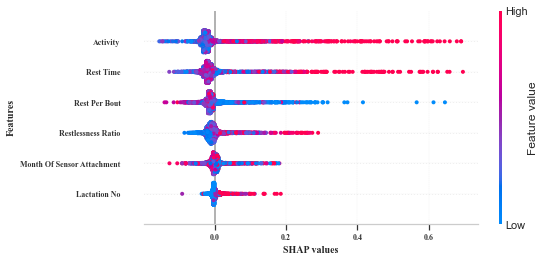

In [95]:
# Setting the background of the figure
sns.set_style('whitegrid')

# Setting the figure size
plt.figure(figsize=(12, 10))

# Plotting SHAP summary plot
shap.summary_plot(shap_values, X_train, show=False)

#Setting font style 
plt.rcParams['font.family'] = 'Times New Roman'

#Customising thr appearnace of chart
plt.grid(True, linestyle=":", linewidth= 0.25)

#Setting ticks, label
plt.xticks(fontsize=8,weight='bold',fontname='Times New Roman')
plt.yticks(fontsize=8,weight='bold',fontname='Times New Roman')
plt.xlabel('SHAP values',fontsize=10,weight='bold', fontname='Times New Roman')
plt.ylabel('Features',fontsize=10,weight='bold', fontname='Times New Roman')

# Saving the plot to a file
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('shap_summary.png', dpi=600, bbox_inches='tight')
#Show the plot
plt.show()

# Closing the plot
plt.close()

# Features importance/ Features ranking

### Library

In [44]:
#Importing library
from sklearn.feature_selection import SelectFromModel

### Random Forest

In [45]:
#Random forest 
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_importances = random_forest.feature_importances_

### Printing feature importance for Random Forest

In [46]:
print('Feature Importance using Random Forest:')
for feature, importance in zip(X.columns, random_forest_importances):
    print(f'{feature}: {importance}')

Feature Importance using Random Forest:
Activity: 0.2683746945049787
Rest Time: 0.2738684935009116
Rest Per Bout: 0.16768250989183828
Restlessness Ratio: 0.152533006868922
Lactation No: 0.033776003445469015
Month Of Sensor Attachment: 0.1037652917878804


### Gradient Boosting

In [47]:
#Gradient boosting 
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_importances = gradient_boosting.feature_importances_

### Printing feature importance for Gradient Boosting

In [48]:
print('Feature Importance using Gradient Boosting:')
for feature, importance in zip(X.columns, gradient_boosting_importances):
    print(f'{feature}: {importance}')

Feature Importance using Gradient Boosting:
Activity: 0.4089540457120775
Rest Time: 0.3150239320407521
Rest Per Bout: 0.12913233836182358
Restlessness Ratio: 0.09200340360600559
Lactation No: 0.002961631906781882
Month Of Sensor Attachment: 0.05192464837255955


### AdaBoost

In [49]:
#AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
adaboost_importances = adaboost.feature_importances_

### Printing feature importance for AdaBoost

In [50]:
print('Feature Importance using AdaBoost:')
for feature, importance in zip(X.columns, adaboost_importances):
    print(f'{feature}: {importance}')

Feature Importance using AdaBoost:
Activity: 0.28
Rest Time: 0.2
Rest Per Bout: 0.36
Restlessness Ratio: 0.12
Lactation No: 0.02
Month Of Sensor Attachment: 0.02


### Logistic Regression

In [51]:
#Logistic Regression 
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_reg_importances = logistic_reg.coef_[0]

### Printing feature importance for Logistic Regression

In [52]:
print('Feature Importance using Logistic Regression:')
for feature, importance in zip(X.columns, logistic_reg_importances):
    print(f'{feature}: {importance}')

Feature Importance using Logistic Regression:
Activity: 0.009557832160911151
Rest Time: 0.00296255859378954
Rest Per Bout: -0.027510703160660784
Restlessness Ratio: 0.08171060265518298
Lactation No: 0.12044244174196075
Month Of Sensor Attachment: 0.01188154707908593


### K-Nearest Neighbors

In [53]:
#K-nearest neighbours 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_importances = [1 / len(X.columns)] * len(X.columns)

### Printing feature importance for K-Nearest Neighbors

In [54]:
print('Feature Importance using K Nearest Neighbors (KNN):')
for feature, importance in zip(X.columns, knn_importances):
    print(f'{feature}: {importance}')

Feature Importance using K Nearest Neighbors (KNN):
Activity: 0.16666666666666666
Rest Time: 0.16666666666666666
Rest Per Bout: 0.16666666666666666
Restlessness Ratio: 0.16666666666666666
Lactation No: 0.16666666666666666
Month Of Sensor Attachment: 0.16666666666666666


### Decision Tree

In [55]:
#Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_importances = decision_tree.feature_importances_

### Printing feature importance for Decision Tree

In [56]:
print('Feature Importance using Decision Tree:')
for feature, importance in zip(X.columns, decision_tree_importances):
    print(f'{feature}: {importance}')

Feature Importance using Decision Tree:
Activity: 0.3635882369008022
Rest Time: 0.2328510779982334
Rest Per Bout: 0.14118719405619895
Restlessness Ratio: 0.14660625012850015
Lactation No: 0.02525115982721094
Month Of Sensor Attachment: 0.09051608108905429


### Naive Bayes

In [57]:
#Naive bayes 
naive_bayes_importances = [1 / len(X.columns)] * len(X.columns)

### Printing feature importance for Naive Bayes

In [58]:
print('Feature Importance using Naive Bayes (GaussianNB):')
for feature, importance in zip(X.columns, naive_bayes_importances):
    print(f'{feature}: {importance}')

Feature Importance using Naive Bayes (GaussianNB):
Activity: 0.16666666666666666
Rest Time: 0.16666666666666666
Rest Per Bout: 0.16666666666666666
Restlessness Ratio: 0.16666666666666666
Lactation No: 0.16666666666666666
Month Of Sensor Attachment: 0.16666666666666666


### Neural Network (Multilayer Percepton)

In [59]:
#Neural netwrok multilayer perceptron 
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_importances = mlp.coefs_[0].mean(axis=0)

### Printing feature importance for Neural Network (Multilayer Percepton)

In [60]:
print('Feature Importance using Neural Network (Multilayer Perceptron):')
for feature, importance in zip(X.columns, mlp_importances):
    print(f'{feature}: {importance}')

Feature Importance using Neural Network (Multilayer Perceptron):
Activity: 0.07156023909709051
Rest Time: 0.037048536800091715
Rest Per Bout: 0.13032440387825703
Restlessness Ratio: -0.015659125667825218
Lactation No: -0.00941722533513666
Month Of Sensor Attachment: -0.01613960508398823


### Kernel Support Vector Machine (Kernel-SVM)

In [61]:
#Kernel support vector machine 
kernel_svm = SVC(kernel='rbf')
kernel_svm.fit(X_train, y_train)
kernel_svm_importances = None

### Printing the developed feature importance for Kernel Support Vector Machine

In [74]:
print('Feature Importance using Kernel Support Vector Machine (K-SVM):')
print('K-SVM does not provide direct feature importances')

Feature Importance using Kernel Support Vector Machine (K-SVM):
K-SVM does not provide direct feature importances


# Validation of developed machine learning algorithms

### Libraries

In [75]:
#Importing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## Holdout validation

### Developed algorithms predictions

In [76]:
logistic_reg_predictions = logistic_reg.predict(X_test_scaled)
random_forest_predictions = random_forest.predict(X_test_scaled)
gradient_boosting_predictions = gradient_boosting.predict(X_test_scaled)
svm_predictions = svm.predict(X_test_scaled)
knn_predictions = knn.predict(X_test_scaled)
decision_tree_predictions = decision_tree.predict(X_test_scaled)
naive_bayes_predictions = naive_bayes.predict(X_test_scaled)
mlp_predictions = mlp.predict(X_test_scaled)
adaboost_predictions = adaboost.predict(X_test_scaled)

### Developed algorithms accuracy & scores

In [77]:
logistic_reg_accuracy = logistic_reg.score(X_test_scaled, y_test)
random_forest_accuracy = random_forest.score(X_test_scaled, y_test)
gradient_boosting_accuracy = gradient_boosting.score(X_test_scaled, y_test)
svm_accuracy = svm.score(X_test_scaled, y_test)
knn_accuracy = knn.score(X_test_scaled, y_test)
decision_tree_accuracy = decision_tree.score(X_test_scaled, y_test)
naive_bayes_accuracy = naive_bayes.score(X_test_scaled, y_test)
mlp_accuracy = mlp.score(X_test_scaled, y_test)
adaboost_accuracy = adaboost.score(X_test_scaled, y_test)

### Printing the results of Holdout validation

In [78]:
# Printing the developed evalaution metrics
print('Holdout Validation Results:')
print('Logistic Regression Accuracy: {:.2f}%'.format(logistic_reg_accuracy * 100))
print('Random Forest Accuracy: {:.2f}%'.format(random_forest_accuracy * 100))
print('Gradient Boosting Accuracy: {:.2f}%'.format(gradient_boosting_accuracy * 100))
print('SVM Accuracy: {:.2f}%'.format(svm_accuracy * 100))
print('KNN Accuracy: {:.2f}%'.format(knn_accuracy * 100))
print('Decision Tree Accuracy: {:.2f}%'.format(decision_tree_accuracy * 100))
print('Naive Bayes Accuracy: {:.2f}%'.format(naive_bayes_accuracy * 100))
print('MLP Accuracy: {:.2f}%'.format(mlp_accuracy * 100))
print('AdaBoost Accuracy: {:.2f}%'.format(adaboost_accuracy * 100))

Holdout Validation Results:
Logistic Regression Accuracy: 93.83%
Random Forest Accuracy: 93.83%
Gradient Boosting Accuracy: 93.49%
SVM Accuracy: 94.16%
KNN Accuracy: 93.83%
Decision Tree Accuracy: 6.40%
Naive Bayes Accuracy: 92.70%
MLP Accuracy: 90.01%
AdaBoost Accuracy: 93.83%


## Cross validation

In [79]:
#Cross Validation tecnique
logistic_reg_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(logistic_reg, X, y, cv=5)]
random_forest_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(random_forest, X, y, cv=5)]
gradient_boosting_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(gradient_boosting, X, y, cv=5)]
svm_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(svm, X, y, cv=5)]
knn_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(knn, X, y, cv=5)]
decision_tree_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(decision_tree, X, y, cv=5)]
naive_bayes_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(naive_bayes, X, y, cv=5)]
mlp_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(mlp, X, y, cv=5)]
adaboost_cv_scores = ["{:.2f}%".format(score * 100) for score in cross_val_score(adaboost, X, y, cv=5)]

### Printing the cross validation results

In [80]:
#Printing the result of cross vaildation
print('\nCross-Validation Results:')
print('Logistic Regression CV Scores:', logistic_reg_cv_scores)
print('Random Forest CV Scores:', random_forest_cv_scores)
print('Gradient Boosting CV Scores:', gradient_boosting_cv_scores)
print('SVM CV Scores:', svm_cv_scores)
print('KNN CV Scores:', knn_cv_scores)
print('Decision Tree CV Scores:', decision_tree_cv_scores)
print('Naive Bayes CV Scores:', naive_bayes_cv_scores)
print('MLP CV Scores:', mlp_cv_scores)
print('AdaBoost CV Scores:', adaboost_cv_scores)


Cross-Validation Results:
Logistic Regression CV Scores: ['93.94%', '93.71%', '94.39%', '93.27%', '93.49%']
Random Forest CV Scores: ['93.60%', '94.50%', '93.94%', '93.60%', '93.04%']
Gradient Boosting CV Scores: ['92.70%', '93.38%', '93.83%', '93.60%', '92.59%']
SVM CV Scores: ['93.71%', '93.60%', '93.49%', '93.38%', '93.71%']
KNN CV Scores: ['92.82%', '93.49%', '94.16%', '93.83%', '92.82%']
Decision Tree CV Scores: ['89.79%', '90.68%', '90.24%', '89.79%', '90.46%']
Naive Bayes CV Scores: ['92.26%', '89.45%', '92.14%', '93.27%', '89.45%']
MLP CV Scores: ['93.38%', '93.27%', '93.38%', '90.57%', '93.49%']
AdaBoost CV Scores: ['93.94%', '93.15%', '93.83%', '93.15%', '93.04%']


# Receiver Operating Characteristic Curve (AUC-ROC)

## Libraries

In [62]:
#Loading libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc

## Selection of variables

In [63]:
#Selection of variables
X = df[['Activity', 'Rest Time', 'Rest Per Bout', 'Restlessness Ratio', 'Lactation No', 'Month Of Sensor Attachment']]
y = df['Calved']

## Data Spliting

In [64]:
#Spliting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4455)

## Training machine learning models

In [65]:
# Initializing the classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()
gb_classifier = GradientBoostingClassifier()
nb_classifier = GaussianNB()
nn_classifier = MLPClassifier()

# Training the models
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
nn_classifier.fit(X_train, y_train)

MLPClassifier()

## Perdictions and calculation of ROC Curve

In [66]:
# Initializing empty dictionaries to store ROC curve data
roc_curves = {}

# Making predictions and calculate ROC curves for each model
classifiers = [
    ("Random Forest", rf_classifier),
    ("Decision Tree", dt_classifier),
    ("Gradient Boosting", gb_classifier),
    ("Naive Bayes", nb_classifier),
    ("Neural Network", nn_classifier)
]

for name, classifier in classifiers:
    y_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, auc_score)

#Convert AUC scores to percentages
roc_curves_percentage = {name: (fpr, tpr, round(auc_score * 100)) for name, (fpr, tpr, auc_score) in roc_curves.items()}

## Ploting ROC Curve

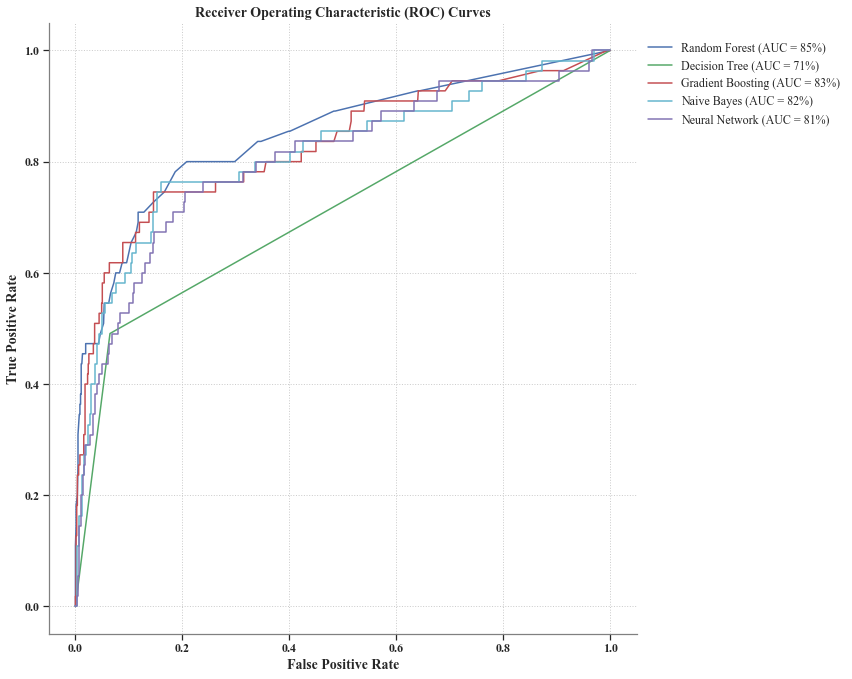

In [72]:
# Defining a list of beautiful colors for the curves
colors = ['b', 'g', 'r', 'c', 'm']

# Setting the figure size
plt.figure(figsize=(12, 10))

for name, (_, _, auc_score) in roc_curves_percentage.items():
    fpr, tpr, _ = roc_curves_percentage[name]
    # Using a unique color for each curve
    color = colors.pop(0)
    plt.plot(fpr, tpr, color, label=f'{name} (AUC = {auc_score}%)')

# Removing the upper and left borders of the chart
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

#Setting font style 
plt.rcParams['font.family'] = 'Times New Roman'

# Setting the title, label, and ticks for the chart
plt.xlabel('False Positive Rate', fontsize=14, weight='bold', fontname='Times New Roman')
plt.ylabel('True Positive Rate', fontsize=14, weight='bold', fontname='Times New Roman')
plt.xticks(fontsize=12, weight='bold', fontname='Times New Roman')
plt.yticks(fontsize=12, weight='bold', fontname='Times New Roman')
plt.title('Receiver Operating Characteristic (ROC) Curves', fontsize=14, weight='bold', fontname='Times New Roman')

# Customizing the colors of the borders and ticks
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

# Displaying grid for better visualization
plt.grid(True, linestyle=':')

# Setting the legend outside of the chart
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9), prop={'family': 'Times New Roman', 'size': 12}, frameon=False)

#Setting the tight layout for chart
plt.tight_layout()


# Saving the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('roc_chart.png', dpi=600, bbox_inches='tight')

# Show the chart
plt.show()